## パーセプトロンに慣れる

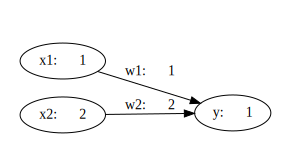

In [8]:
from graphviz import Digraph
dot = Digraph(comment="単純パーセプトロン")
dot.attr(rankdir="LR")
dot.attr(splines="line")
dot.attr(fixedsize="true")
with dot.subgraph(name="cluster_x") as x:
    x.attr(label="入力層")
    x.attr(color="white")
    x.node("x1","x1:入力1")
    x.node("x2","x2:入力2")
with dot.subgraph(name="cluster_y") as y:
    y.attr(label="出力層")
    y.attr(color="white")
    y.node("y","y:出力1")
dot.edge("x1", "y", label="w1:重み1")
dot.edge("x2",  "y", label="w2:重み2")
#print(dot)
dot

今、x1:入力1とx2:入力2を0〜1の変数と仮定すると、以下のように発火判定をして任意のCPU処理を実装することが可能になる。  
つまり、パーセプトロンは__チューリング完全__であり、電子コンピュータで出来ることがパーセプトロンでも出来ることを示している。

$$\begin{eqnarray}
AND発火判定\ \ \ \ y= \left\{
\begin{array}{ll}
0\ \ \ \ (0.5x_1 + 0.5x_2 \leq 0.6)\\
1\ \ \ \ (0.5x_1 + 0.5x_2 \gt 0.6)\\
\end{array}
\right\}
\end{eqnarray}$$

In [3]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.6 #0001
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

$$\begin{eqnarray}
OR発火判定\ \ \ \ y= \left\{
\begin{array}{ll}
0\ \ \ \ (0.5x_1 + 0.5x_2 \leq 0.4)\\
1\ \ \ \ (0.5x_1 + 0.5x_2 \gt 0.4)\\
\end{array}
\right\}
\end{eqnarray}$$

In [4]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.4 #0111
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

$$\begin{eqnarray}
NAND発火判定\ \ \ \ y= \left\{
\begin{array}{ll}
0\ \ \ \ (0.5x_1 + 0.5x_2 \gt 0.6)\\
1\ \ \ \ (0.5x_1 + 0.5x_2 \leq 0.6)\\
\end{array}
\right\}
\end{eqnarray}$$

In [5]:
def NAND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.6 #1110
    tmp = x1*w1 + x2*w2
    if tmp > theta:
        return 0
    else:
        return 1

$$\begin{eqnarray}
NOR発火判定\ \ \ \ y= \left\{
\begin{array}{ll}
0\ \ \ \ (0.5x_1 + 0.5x_2 \gt 0.4)\\
1\ \ \ \ (0.5x_1 + 0.5x_2 \leq 0.4)\\
\end{array}
\right\}
\end{eqnarray}$$

In [9]:
def NOR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.4 #1000
    tmp = x1*w1 + x2*w2
    if tmp > theta:
        return 0
    else:
        return 1

$$\begin{eqnarray}
XOR発火判定\ \ 
\ \ y= \left\{
\begin{array}{ll}
0\ \ \ \ AND (NAND, OR)\\
1\ \ \ \ AND (NAND, OR)\\
\end{array}
\right\}
\end{eqnarray}$$

In [7]:
def XOR(x1, x2):
    AND_x1x2 = AND(x1,x2) # 0001
    OR_x1x2 = OR(x1, x2) #0111
    AND_x1x2 = NAND(x1,x2) #1110
    return AND(NAND_x1x2, OR_x1x2) #0110